In [1]:
from models import load_pretrained
from loader.Robot_dataset import Robot
import matplotlib.pyplot as plt
from utils.utils import fit_kde, sampling

## Load trained models

In [2]:
mmppp, cfg = load_pretrained(
    root='results/robot-manifold',
    identifier='mmppp_zdim2',
    config_file='mmppp.yml',
    ckpt_file='model_best.pkl'
)
immppp, cfg = load_pretrained(
    root='results/robot-manifold',
    identifier='immppp_zdim2_reg1',
    config_file='immppp.yml',
    ckpt_file='model_best.pkl' 
)
ds = Robot(
    root=f'datasets/robot-manifold'
)

Robot split training | torch.Size([10, 201, 7])


## Plot latent spaces

c:\Users\21448\anaconda3\envs\MMPpp\lib\site-packages\matplotlib\axes\_axes.py:4405: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  c = np.asanyarray(c, dtype=float)


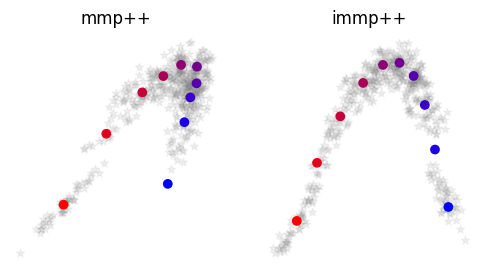

In [3]:
n_samples = 500
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
for i, (model, model_name) in enumerate(zip([mmppp, immppp], ['mmp++', 'immp++'])):
    z = model.encode(model.get_w_from_traj(ds.data)).detach()
    local_cov, thr = fit_kde(z, h_mul=0.5)
    z_samples = sampling(n_samples, z, local_cov, thr)
    ax[i].scatter(z_samples[:,0], z_samples[:,1], c='tab:gray', alpha=0.1, marker='*')
    ax[i].scatter(z[:,0], z[:,1], c=[[(i-1)/9, 0, 1-(i-1)/9] for i in ds.targets])
    ax[i].axis('off')
    ax[i].set_title(f'{model_name}')